In [6]:
import pandas as pd
import sqlite3

# Query all agents
conn = sqlite3.connect("agents.db")
pd_agents = pd.read_sql_query("SELECT * FROM agents", conn)
pd_agents

,agent_id,age,gender,state,route,routine,home,destination,destination_type,days_in_state,...,demographic_education,demographic_income_level,health_immune_system_strength,health_pre_existing_conditions,psychographic_risk_attitude,psychographic_belief_system,psychographic_information_sensitivity,psychographic_fear_level,behavior_routine,behavior_compliance_level
0,0,23,F,S,"302,9000,9001,9002,9003,9004,9100,9101,9103,91...","302,302,302,302,302,302,302,302,302,302,302,30...",302,488,Workplace,0,...,Bachelor's Degree,"$30,000 - $40,000",Strong,None,Moderate,Progressive,High,Moderate,"Starts from home, commutes using the bus syste...",High
1,1,16,F,S,"90,7506,7010,7000,7001,7002,7003,7004,7005,700...","90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,9...",90,310,School,0,...,High School Student,N/A,Strong,None,Low Risk,Open-minded and inclusive,Moderate,Low,"Starts from home, takes the bus to school, att...",High
2,2,8,F,S,"227,311","227,227,227,227,227,227,227,227,227,227,227,22...",227,311,School,0,...,Primary School,Dependent on guardians,Strong,None,Low risk-averse,"Curiosity driven, believes in kindness and sha...",Low sensitivity to complex information,Low fear towards health concerns,"Wakes up early, gets ready for school, eats br...",High compliance with adult requests and school...
3,3,50,M,S,"37,10003,10004,10010,10005,10006,9110,14001,12...","37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,3...",37,489,Workplace,0,...,Bachelor's Degree,Middle Income,Average,Hypertension,Cautious,Pragmatic and Health Conscious,Medium,Moderate,"Starts each day with a healthy breakfast, comm...",High
4,4,0,M,S,"260,5107,12000,12001,12007,12002,12003,7111,71...","260,260,260,260,260,260,260,260,260,260,260,26...",260,312,School,0,...,Not applicable,Not applicable,strong,None,low,Trust in educational systems and community sup...,medium,low,"Starts from home, commutes using bus system to...",high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,17,F,S,"226,2502,2001,2000,2101,2102,2103,2104,2105,22...","226,226,226,226,226,226,226,226,226,226,226,22...",226,319,School,0,...,High School Student,N/A,Good,None,Moderate Risk-Averse,"Valuing friendships and education, with a posi...",Low; generally receptive to new ideas,Moderate; concerned about public health but no...,"Starts the day at home, takes a bus to school,...",High; follows health guidelines and protocols ...
996,996,52,M,S,"85,5000,5001,5002,5005,5100,5101,5102,5103,510...","85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,8...",85,571,Workplace,0,...,Bachelor's Degree,Middle Income,Average,None,Moderately Risk-Averse,Pragmatic and Community-Oriented,Moderate,Low,"Starts at home, commutes using the bus system ...",High
997,997,12,F,S,"284,9000,9001,9002,9003,9004,9100,9101,9103,91...","284,284,284,284,284,284,284,284,284,284,284,28...",284,320,School,0,...,Middle School,N/A,Strong,None,Low,Curious and eager to learn,Medium,Low,"Starts the day getting ready for school, commu...",High
998,998,2,F,S,"150,6000,6001,6002,6100,6101,6102,6103,6104,61...","150,150,150,150,150,150,150,150,150,150,150,15...",150,321,School,0,...,None,N/A,Developing,None,Low,Curiosity about the world,Low,Low,"Starts from home, commutes to school by bus, e...",High


Total Nodes: 1000
Total Edges: 4825


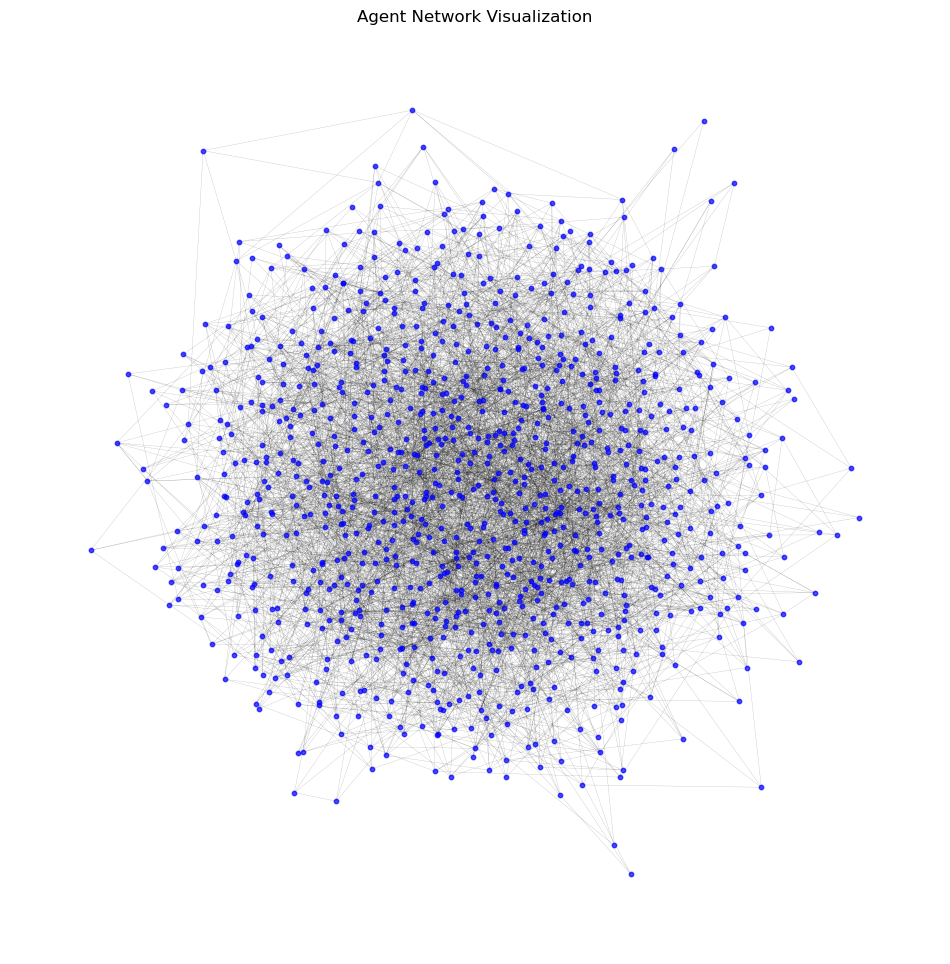

In [7]:
agents = pd_agents.to_dict(orient='records')


import networkx as nx
import random

# Create a network using NetworkX
G = nx.Graph()

# Add nodes for each agent
for agent in agents:
    G.add_node(agent['agent_id'])

# Add edges between agents based on shared homes or workplaces (Strong Ties)
home_groups = {}  # To track which agents are in the same home
workplace_groups = {}  # To track which agents are in the same workplace

for agent in agents:
    # Add agents to home groups
    home_id = agent['home']
    if home_id not in home_groups:
        home_groups[home_id] = []
    home_groups[home_id].append(agent['agent_id'])
    
    # Add agents to workplace groups
    workplace_id = agent['destination']
    if agent['destination_type'] == "Workplace":
        if workplace_id not in workplace_groups:
            workplace_groups[workplace_id] = []
        workplace_groups[workplace_id].append(agent['agent_id'])

# Create strong ties (home connections)
for home_id, members in home_groups.items():
    if len(members) > 1:  # Only create edges if there's more than one person in the home
        for i in range(len(members)):
            for j in range(i + 1, len(members)):
                G.add_edge(members[i], members[j])

# Create strong ties (workplace connections)
for workplace_id, members in workplace_groups.items():
    if len(members) > 1:  # Only create edges if there's more than one person in the workplace
        for i in range(len(members)):
            for j in range(i + 1, len(members)):
                G.add_edge(members[i], members[j])

# Add random connections between agents to create weak ties (Random Friends)
num_agents = len(agents)
random_friend_connections = 3000  # Arbitrary number of random connections to add

for _ in range(random_friend_connections):
    agent1 = random.randint(0, num_agents - 1)
    agent2 = random.randint(0, num_agents - 1)
    if agent1 != agent2 and not G.has_edge(agent1, agent2):
        G.add_edge(agent1, agent2)

# Check the number of nodes and edges in the network
print(f"Total Nodes: {G.number_of_nodes()}")
print(f"Total Edges: {G.number_of_edges()}")


import matplotlib.pyplot as plt
import random

# Set seed for reproducibility
random.seed(42)

# Create a layout for the nodes (using spring layout for more visually appealing placement)
layout = nx.spring_layout(G, seed=42)

# Draw the nodes
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, layout, node_size=10, node_color='blue', alpha=0.7)

# Draw the edges
nx.draw_networkx_edges(G, layout, alpha=0.3, width=0.2)

# Hide axis
plt.axis('off')

# Show plot
plt.title("Agent Network Visualization")
plt.show()

In [8]:
import sqlite3

# Connect to the database
conn = sqlite3.connect("agents.db")
cur = conn.cursor()

# Create a table for the network
cur.execute("CREATE TABLE IF NOT EXISTS network (agent1 INT, agent2 INT)")

# Insert edges into the network table
for edge in G.edges():
    cur.execute("INSERT INTO network (agent1, agent2) VALUES (?, ?)", (edge[0], edge[1]))
    cur.execute("INSERT INTO network (agent1, agent2) VALUES (?, ?)", (edge[1], edge[0]))
    
# Commit and close the connection
conn.commit()
conn.close()

In [9]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('BAAI/bge-base-en-v1.5')
model = AutoModel.from_pretrained('BAAI/bge-base-en-v1.5')
model.eval()


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
# Import necessary libraries
import pandas as pd
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt
import random
import torch
from transformers import AutoTokenizer, AutoModel
from pydantic import BaseModel
import os
from openai import OpenAI
import dotenv

# Load environment variables
dotenv.load_dotenv()

openai = OpenAI(
        api_key=os.environ.get('OPENAI_API_KEY'),  # This is the default and can be omitted
    )

TICKS_PER_DAY = 288  # 5-minute intervals per day

# Constants and Parameters
ALPHA = 0.1  # Transmission rate from Susceptible to Exposed
BETA = 0.4   # Probability that Exposed becomes asymptomatic Infected
GAMMA = 0.3  # Probability that asymptomatic Infected becomes seriously Infected
THETA = 0.4  # Probability that seriously Infected becomes critically Infected
PHI = 0.1    # Death rate for Critically-Infected individuals
OMEGA = 0.1  # Immune rate for Recovered individuals

# Time periods individuals must stay in each state (in days)
TIME_PERIODS = {
    'E': 5,    # Exposed
    'IA': 5,   # Asymptomatic Infected
    'IS': 5,   # Seriously Infected
    'IC': 5,   # Critically Infected
    'R': 5     # Recovered
}

# States
STATES = {
    'S': 'Susceptible',
    'E': 'Exposed',
    'IA': 'Asymptomatic Infected',
    'IS': 'Seriously Infected',
    'IC': 'Critically Infected',
    'R': 'Recovered',
    'M': 'Immune',
    'D': 'Dead'
}

BEHAVIORS = {
    'wearings_mask': 0.1,
    'maintaining_social_distance': 0.3,
    'self_isolating': 0
}

mean_contact_values = {
    'Home': 1,
    'Bus': 5,
    'Workplace': 3,
    'Market': 4,
    'School': 2,
    'Terminal': 3
}

# Define data models using Pydantic
from pydantic import BaseModel

class Memory(BaseModel):
    description: str
    day: int
    importance: int

class Behavior(BaseModel):
    wearing_mask: bool
    maintaining_social_distance: bool
    self_isolating: bool
        
class Belief(BaseModel):
    description: str
    sentiment: str
        
class Beliefs(BaseModel):
    beliefs: list[Belief]
    
class News(BaseModel):
    headline: str
        
def generate_beliefs(memories: list[Memory]):
    return ""
    completion = openai.beta.chat.completions.parse(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a reflection generation model. You are given a list of memories and asked to generate reflections based on them."},
        {"role": "user", "content": "Memories: "+ " ".join([memory.description for memory in memories])},
    ],
        response_format=Beliefs,
    )

    beliefs = completion.choices[0].message.parsed
    return beliefs

def generate_behavior(beliefs: list[Belief]):
    return ""
    completion = openai.beta.chat.completions.parse(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a behavior generation model. You are given a list of beliefs and asked to generate behaviors based on them."},
        {"role": "user", "content": "Beliefs: "+ " ".join([belief.description for belief in beliefs])},
    ],
        response_format=Behavior,
    )

    behavior = completion.choices[0].message.parsed
    return behavior
    

def generate_news(information: str):
    return ""
    completion = openai.beta.chat.completions.parse(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a news generation model. You are given some information about epidemic and asked to generate a news headline based on it."},
        {"role": "user", "content": "Information: "+ information},
    ],
        response_format=News,
    )

    news = completion.choices[0].message.parsed
    return news.headline

# Agent class definition
class Agent:
    def __init__(self, agent_id, age, gender, home, destination, destination_type, routine, network_neighbors, persona):
        self.agent_id = agent_id
        self.age = age
        self.gender = gender
        self.home = home
        self.destination = destination
        self.destination_type = destination_type
        self.routine = routine
        self.network_neighbors = network_neighbors
        self.persona = persona
        
        # Changing states during simulation
        self.state = 'S'
        self.days_in_state = 0
        self.memories = []
        self.behavior = Behavior(wearing_mask=False, maintaining_social_distance=False, self_isolating=False)
        self.beliefs = []
        self.exposure = 0
        
        self.locations = [None] * TICKS_PER_DAY
        
        self.calculate_location()
        
        # New attributes
        self.daily_interactions = []
        self.received_information = []
        
    def __repr__(self):
        return f"Agent {self.agent_id} ({self.persona})"
        
    def __str__(self):
        return f"Agent {self.agent_id} ({self.persona})"
    
    def calculate_location(self):
        for tick in range(TICKS_PER_DAY):
            location_id = self.routine[tick]
            if location_id == self.home:
                self.locations[tick] = (location_id, 'Home')
            elif location_id == self.destination:
                self.locations[tick] = (location_id, self.destination_type)
            else:
                self.locations[tick] = (location_id, 'Bus')
        
    
    def get_location(self, current_tick):
        if self.state == 'D':
            # Dead agents are not moving
            return None, 'Dead'
        if self.behavior.self_isolating:
            # If self-isolating, agent stays at home
            return self.home, 'Home'
        else:
            return self.locations[current_tick]
        
    def get_nearby_agents(self, current_tick, agents):
        current_location_id, _ = self.get_location(current_tick)
        # Find all agents in the same location
        nearby_agents = [agent for agent in agents if agent.agent_id != self.agent_id and agent.get_location(current_tick)[0] == current_location_id]
        return nearby_agents
        
    def get_network_neighbors(self, agents):
        return [agent for agent in agents if agent.agent_id in self.network_neighbors]
        
    def interact(self, agent, current_tick):
        # Only proceed if neither agent is dead
        if self.state == 'D' or agent.state == 'D':
            return
        # Record interaction
        interaction = {
            'agent_id': agent.agent_id,
            'wearing_mask': agent.behavior.wearing_mask,
            'maintaining_social_distance': agent.behavior.maintaining_social_distance,
            'self_isolating': agent.behavior.self_isolating,
            'state': agent.state
        }
        self.daily_interactions.append(interaction)
        
        infectious_states = ['E', 'IA', 'IS', 'IC']
        if self.state in infectious_states and agent.state == 'S':
            exposure_score = 1
            if self.behavior.wearing_mask:
                exposure_score *= BEHAVIORS['wearings_mask']
            if self.behavior.maintaining_social_distance:
                exposure_score *= BEHAVIORS['maintaining_social_distance']
            if self.behavior.self_isolating:
                exposure_score *= BEHAVIORS['self_isolating']
            if agent.behavior.wearing_mask:
                exposure_score *= BEHAVIORS['wearings_mask']
            if agent.behavior.maintaining_social_distance:
                exposure_score *= BEHAVIORS['maintaining_social_distance']
            if agent.behavior.self_isolating:
                exposure_score *= BEHAVIORS['self_isolating']
            location_type = self.get_location(current_tick)[1]
            exposure_score *= mean_contact_values.get(location_type, 1)
            agent.exposure += exposure_score
        elif agent.state in infectious_states and self.state == 'S':
            exposure_score = 1
            if self.behavior.wearing_mask:
                exposure_score *= BEHAVIORS['wearings_mask']
            if self.behavior.maintaining_social_distance:
                exposure_score *= BEHAVIORS['maintaining_social_distance']
            if self.behavior.self_isolating:
                exposure_score *= BEHAVIORS['self_isolating']
            if agent.behavior.wearing_mask:
                exposure_score *= BEHAVIORS['wearings_mask']
            if agent.behavior.maintaining_social_distance:
                exposure_score *= BEHAVIORS['maintaining_social_distance']
            if agent.behavior.self_isolating:
                exposure_score *= BEHAVIORS['self_isolating']
            location_type = self.get_location(current_tick)[1]
            exposure_score *= mean_contact_values.get(location_type, 1)
            self.exposure += exposure_score
        
    # Modify the update_state function in the Agent class
    def update_state(self):
        if self.state == 'S':
            probability = ALPHA * self.exposure / 12
            if random.random() < probability:
                self.state = 'E'
                self.days_in_state = 0
        elif self.state == 'E':
            if self.days_in_state >= TIME_PERIODS['E']:
                if random.random() < BETA:
                    self.state = 'IA'  # Exposed -> Asymptomatic Infected
                else:
                    self.state = 'IS'  # Exposed -> Seriously Infected
                self.days_in_state = 0
        elif self.state == 'IA':
            if self.days_in_state >= TIME_PERIODS['IA']:
                if random.random() < GAMMA:
                    self.state = 'IS'  # Asymptomatic Infected -> Seriously Infected
                else:
                    self.state = 'R'   # Asymptomatic Infected -> Recovered
                self.days_in_state = 0
        elif self.state == 'IS':
            if self.days_in_state >= TIME_PERIODS['IS']:
                if random.random() < THETA:
                    self.state = 'IC'  # Seriously Infected -> Critically Infected
                else:
                    self.state = 'R'   # Seriously Infected -> Recovered
                self.days_in_state = 0
        elif self.state == 'IC':
            if self.days_in_state >= TIME_PERIODS['IC']:
                if random.random() < PHI:
                    self.state = 'D'   # Critically Infected -> Deceased
                else:
                    self.state = 'R'   # Critically Infected -> Recovered
                self.days_in_state = 0
        elif self.state == 'R':
            if self.days_in_state >= TIME_PERIODS['R']:
                if random.random() < OMEGA:
                    self.state = 'M'   # Recovered -> Immune
                else:
                    self.state = 'S'   # Recovered -> Susceptible
                self.days_in_state = 0
        self.exposure = 0
        self.days_in_state += 1
        
    def summarize_observations(self, day):
        # Summarize today's interactions
        total_interactions = len(self.daily_interactions)
        mask_wearers = sum(1 for interaction in self.daily_interactions if interaction['wearing_mask'])
        social_distancers = sum(1 for interaction in self.daily_interactions if interaction['maintaining_social_distance'])
        self_isolators = sum(1 for interaction in self.daily_interactions if interaction['self_isolating'])
        
        # Create a summary description
        description = f"On day {day+1}, I interacted with {total_interactions} people. {mask_wearers} were wearing masks, {social_distancers} were maintaining social distance, and {self_isolators} were self-isolating."
        importance = 5  # Arbitrary importance
        self.memorize(description, day, importance)
        # Clear daily interactions for the next day
        self.daily_interactions = []
        
    def receive_information(self, information, day):
        # Memorize the information
        description = f"On day {day+1}, I heard that {information}"
        importance = 5  # Importance could be adjusted
        self.memorize(description, day, importance)
        # Decide whether to pass it on to network neighbors
        # For simplicity, let's assume a fixed probability to pass on
        pass_probability = 0.5  # Adjust as needed
        if random.random() < pass_probability:
            self.received_information.append((information, day))
        
    def memorize(self, description, day, importance):
        memory = Memory(description=description, day=day, importance=importance)
        self.memories.append(memory)
        # Debug logging
        # print(f"Agent {self.agent_id} memorized: {description}")
        
    def reflect(self, day):
        recent_memories = [memory for memory in self.memories if memory.day >= day - 1]
        if recent_memories:
            self.beliefs = generate_beliefs(recent_memories)
        # Debug logging
        # print(f"Agent {self.agent_id} reflected on memories")
        
    def plan(self):
        if self.beliefs:
            self.behavior = generate_behavior(self.beliefs)
        # Debug logging
        # print(f"Agent {self.agent_id} planned behavior: {self.behavior}")
        
# Function to get agents from the database
def get_agents_db():
    conn = sqlite3.connect("agents.db")
    pd_agents = pd.read_sql_query("SELECT * FROM agents", conn)
    conn.close()
    return pd_agents.to_dict(orient='records')

# Function to get network neighbors from the database
def get_network_neighbors_db(agent_id):
    conn = sqlite3.connect("agents.db")
    cur = conn.cursor()
    cur.execute("SELECT agent2 FROM network WHERE agent1 = ?", (agent_id,))
    neighbors = [row[0] for row in cur.fetchall()]
    conn.close()
    return neighbors

# Load agents from the database
agents_db = get_agents_db()
agents = []

for agent_db in agents_db:
    agent = Agent(
        agent_id=agent_db['agent_id'],
        age=agent_db['age'],
        gender=agent_db['gender'],
        home=agent_db['home'],
        destination=agent_db['destination'],
        destination_type=agent_db['destination_type'],
        routine=agent_db['routine'].split(','),  # Assuming routine is a comma-separated string
        network_neighbors=get_network_neighbors_db(agent_db['agent_id']),
        persona=f"He/She is a {agent_db['age']} year old {agent_db['gender']} who goes to {agent_db['destination_type']} everyday. He/She has following personality: Openness: {agent_db['personality_openness']}, Conscientiousness: {agent_db['personality_conscientiousness']}, Extraversion: {agent_db['personality_extraversion']}, Agreeableness: {agent_db['personality_agreeableness']}, Neuroticism: {agent_db['personality_neuroticism']}. He/She has following demographic: Education: {agent_db['demographic_education']}, Income Level: {agent_db['demographic_income_level']}. He/She has following health: Immune System Strength: {agent_db['health_immune_system_strength']}, Pre-existing Conditions: {agent_db['health_pre_existing_conditions']}. He/She has following psychographic: Risk Attitude: {agent_db['psychographic_risk_attitude']}, Belief System: {agent_db['psychographic_belief_system']}, Information Sensitivity: {agent_db['psychographic_information_sensitivity']}, Fear Level: {agent_db['psychographic_fear_level']}. He/She has following behavior: Routine: {agent_db['behavior_routine']}, Compliance Level: {agent_db['behavior_compliance_level']}"
    )
    agents.append(agent)
    
def get_overall_stats(agents: list[Agent]):
    num_susceptible = sum(1 for agent in agents if agent.state == 'S')
    num_exposed = sum(1 for agent in agents if agent.state == 'E')
    num_asymptomatic = sum(1 for agent in agents if agent.state == 'IA')
    num_seriously_infected = sum(1 for agent in agents if agent.state == 'IS')
    num_critically_infected = sum(1 for agent in agents if agent.state == 'IC')
    num_recovered = sum(1 for agent in agents if agent.state == 'R')
    num_immune = sum(1 for agent in agents if agent.state == 'M')
    num_dead = sum(1 for agent in agents if agent.state == 'D')
    return {
        'Susceptible': num_susceptible,
        'Exposed': num_exposed,
        'Asymptomatic': num_asymptomatic,
        'Seriously Infected': num_seriously_infected,
        'Critically Infected': num_critically_infected,
        'Recovered': num_recovered,
        'Immune': num_immune,
        'Dead': num_dead
    }
    
stats_records = []
    
# Infect a small number of agents at the start
initial_infected = random.sample(agents, k=10)
for agent in initial_infected:
    agent.state = 'E'
    agent.days_in_state = 0
    
# Main simulation loop
NUM_DAYS = 30  # Number of days to simulate
TICKS_PER_DAY= 288 # 5-minute intervals per day

from tqdm import tqdm

for day in tqdm(range(NUM_DAYS), desc="Days"):
    for tick in tqdm(range(TICKS_PER_DAY), desc="Ticks", leave=False):
        # print(f"Simulating tick {tick+1}")
        # For each agent, interact with nearby agents
        for agent in agents:
            # Skip if agent is dead
            if agent.state == 'D':
                continue
            nearby_agents = agent.get_nearby_agents(tick, agents)
            # Interact with nearby agents
            for other_agent in nearby_agents:
                agent.interact(other_agent, tick)
    # At the end of the day, agents summarize observations
    for agent in agents:
        agent.summarize_observations(day)
    
    # Generate news and spread it to some random agents
    stats = get_overall_stats(agents)
    stats_records.append(stats)
    num_infected = stats['Exposed'] + stats['Asymptomatic'] + stats['Seriously Infected'] + stats['Critically Infected']
    if len(stats_records) >= 2:
        previous_num_infected = stats_records[-2]['Exposed'] + stats_records[-2]['Asymptomatic'] + stats_records[-2]['Seriously Infected'] + stats_records[-2]['Critically Infected']
        news = generate_news(f"Today, there were {num_infected} new infections. Total infections: {num_infected}. Previous day infections: {previous_num_infected}. Also, {stats['Dead']} people died, which is increased from the previous day by {stats['Dead'] - stats_records[-2]['Dead']}.")
        
        
        # Spread news to random agents
        num_agents_to_receive_news = int(0.1 * len(agents))  # For example, 10% of agents receive the news
        agents_receiving_news = random.sample(agents, num_agents_to_receive_news)
        
        for agent in agents_receiving_news:
            agent.receive_information(news, day)
    
    # Agents pass information to their neighbors
    for agent in agents:
        for information, info_day in agent.received_information:
            # Pass the information to neighbors with some probability
            pass_probability = 0.5  # Adjust as needed
            for neighbor_id in agent.network_neighbors:
                if random.random() < pass_probability:
                    neighbor_agent = next((a for a in agents if a.agent_id == neighbor_id), None)
                    if neighbor_agent:
                        neighbor_agent.receive_information(information, day)
        # Clear received_information after passing it on
        agent.received_information = []
        
    # Update agent's health state
    for agent in agents:
        agent.update_state()
        
    # Agents reflect on memories and plan behavior
    for agent in agents:
        agent.reflect(day)
        agent.plan()
    
    # Collect statistics for the day
    num_susceptible = sum(1 for agent in agents if agent.state == 'S')
    num_exposed = sum(1 for agent in agents if agent.state == 'E')
    num_asymptomatic = sum(1 for agent in agents if agent.state == 'IA')
    num_seriously_infected = sum(1 for agent in agents if agent.state == 'IS')
    num_critically_infected = sum(1 for agent in agents if agent.state == 'IC')
    num_recovered = sum(1 for agent in agents if agent.state == 'R')
    num_immune = sum(1 for agent in agents if agent.state == 'M')
    num_dead = sum(1 for agent in agents if agent.state == 'D')
    print(f"Day {day+1} stats: Susceptible: {num_susceptible}, Exposed: {num_exposed}, Asymptomatic: {num_asymptomatic}, Seriously Infected: {num_seriously_infected}, Critically Infected: {num_critically_infected}, Recovered: {num_recovered}, Immune: {num_immune}, Dead: {num_dead}")
    
# Optionally, visualize the final network
# Create a network graph
G = nx.Graph()
for agent in agents:
    G.add_node(agent.agent_id, state=agent.state)

# Add edges between agents based on network neighbors
for agent in agents:
    for neighbor_id in agent.network_neighbors:
        G.add_edge(agent.agent_id, neighbor_id)

# Draw the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
node_colors = []
for agent in agents:
    if agent.state == 'S':
        node_colors.append('green')
    elif agent.state == 'E':
        node_colors.append('orange')
    elif agent.state == 'IA':
        node_colors.append('pink')
    elif agent.state == 'IS':
        node_colors.append('red')
    elif agent.state == 'IC':
        node_colors.append('darkred')
    elif agent.state == 'R':
        node_colors.append('blue')
    elif agent.state == 'M':
        node_colors.append('yellow')
    elif agent.state == 'D':
        node_colors.append('black')
nx.draw_networkx_nodes(G, pos, node_size=20, node_color=node_colors)
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.title("Agent Network Visualization")
plt.axis('off')
plt.show()


Days:   3%|▎         | 1/30 [00:36<17:38, 36.50s/it]

Day 1 stats: Susceptible: 526, Exposed: 474, Asymptomatic: 0, Seriously Infected: 0, Critically Infected: 0, Recovered: 0, Immune: 0, Dead: 0
